In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

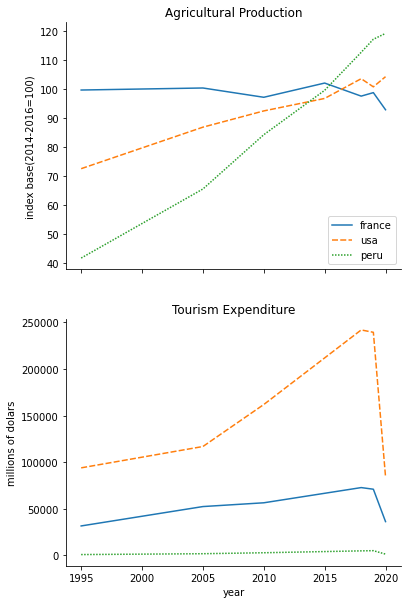

In [61]:
agriculture = pd.read_csv('~/Downloads/Agricultural_Index.csv', skiprows=1)
tourism_expenditure = pd.read_csv('~/Downloads/Tourist-Visitors_Arrival_and_Expenditure.csv', skiprows=1)

agriculture.rename(columns={"Unnamed: 1": "Countries"}, inplace = True)
tourism_expenditure.rename(columns={"Unnamed: 1": "Countries"}, inplace = True)

agriculture.columns = [x.lower().strip() for x in agriculture.columns]
tourism_expenditure.columns = [x.lower().strip() for x in tourism_expenditure.columns]


tourism_expenditure = tourism_expenditure[['countries','series' , 'year', 'value']] #value in millions of US dolars
tourism_expenditure.set_index('year', inplace = True)

tourism_expenditure_peru = tourism_expenditure[(tourism_expenditure['countries'].eq('Peru') & tourism_expenditure['series'].eq('Tourism expenditure (millions of US dollars)'))]
tourism_expenditure_usa = tourism_expenditure[(tourism_expenditure['countries'].eq('United States of America') & tourism_expenditure['series'].eq('Tourism expenditure (millions of US dollars)'))]
tourism_expenditure_france = tourism_expenditure[(tourism_expenditure['countries'].eq('France') & tourism_expenditure['series'].eq('Tourism expenditure (millions of US dollars)'))]

agriculture = agriculture[['countries', 'year', 'series', 'value']] #agriculture_produccion index base(2014-2016=100)
agriculture.set_index('year', inplace = True)


agriculture_peru = agriculture[(agriculture['countries'].eq('Peru') & agriculture['series'].eq('Agricultural production (Index Base: 2014-2016 = 100)'))]
agriculture_usa = agriculture[(agriculture['countries'].eq('United States of America') & agriculture['series'].eq('Agricultural production (Index Base: 2014-2016 = 100)'))]
agriculture_france = agriculture[(agriculture['countries'].eq('France') & agriculture['series'].eq('Agricultural production (Index Base: 2014-2016 = 100)'))]


tourism_expenditure_final = pd.DataFrame()

tourism_expenditure_final['france'] = tourism_expenditure_france['value']
tourism_expenditure_final['usa'] = tourism_expenditure_usa['value']
tourism_expenditure_final['peru'] = tourism_expenditure_peru['value']
for x in tourism_expenditure_final.columns:
    tourism_expenditure_final[x] = tourism_expenditure_final[x].apply(lambda x: x.replace(",", ''))
    tourism_expenditure_final[x] = tourism_expenditure_final[x].apply(lambda x: float(x))


agriculture_final = pd.DataFrame()

agriculture_final['france'] = agriculture_france['value']
agriculture_final['usa'] = agriculture_usa['value']
agriculture_final['peru'] = agriculture_peru['value']

#agriculture_final.plot()
#tourism_expenditure_final.plot()

fig, ax = plt.subplots(2,1, figsize=(6,10), sharex=True)


sns.lineplot(data=agriculture_final[1:], ax=ax[0])
sns.lineplot(data=tourism_expenditure_final, ax=ax[1], legend=False)

ax[0].set(ylabel='index base(2014-2016=100)', title='Agricultural Production')
ax[1].set(ylabel='millions of dolars', title='Tourism Expenditure')
sns.move_legend(ax[0], "lower right")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)